In [28]:
import concurrent.futures as cf
import zipfile
import collections
import zarr
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pandas as pd
import humanfriendly
import os
import sys
from pathlib import Path

ZARR_DIR = "viridian_data/viridian_mafft_2024-10-14_v1.vcz"
ZIP_FILE = "viridian_data/viridian_mafft_2024-10-14_v1.vcz.zip"
DATA_WORK_DIR="viridian_data/alignments/data"

In [7]:
!ls -lh {ZIP_FILE}

-rw-r--r-- 1 jk jk 391M Jan 29 15:39 viridian_data/viridian_mafft_2024-10-14_v1.vcz.zip


In [8]:
!du -sh {ZARR_DIR}

1.2G	viridian_data/viridian_mafft_2024-10-14_v1.vcz


In [13]:
!du -sch {DATA_WORK_DIR}/batch1.extracted/*.fa {DATA_WORK_DIR}/batch2.extracted/*.fa 

2.8G	viridian_data/alignments/data/batch1.extracted/10.fa
2.8G	viridian_data/alignments/data/batch1.extracted/11.fa
2.8G	viridian_data/alignments/data/batch1.extracted/12.fa
2.8G	viridian_data/alignments/data/batch1.extracted/13.fa
2.8G	viridian_data/alignments/data/batch1.extracted/14.fa
2.8G	viridian_data/alignments/data/batch1.extracted/15.fa
2.8G	viridian_data/alignments/data/batch1.extracted/16.fa
2.8G	viridian_data/alignments/data/batch1.extracted/17.fa
2.8G	viridian_data/alignments/data/batch1.extracted/18.fa
2.8G	viridian_data/alignments/data/batch1.extracted/19.fa
2.8G	viridian_data/alignments/data/batch1.extracted/1.fa
2.8G	viridian_data/alignments/data/batch1.extracted/20.fa
2.8G	viridian_data/alignments/data/batch1.extracted/21.fa
2.8G	viridian_data/alignments/data/batch1.extracted/22.fa
2.8G	viridian_data/alignments/data/batch1.extracted/23.fa
2.8G	viridian_data/alignments/data/batch1.extracted/24.fa
2.8G	viridian_data/alignments/data/batch1.extracted/25.fa
2.8G	viridian_d

In [14]:
!du -sch {DATA_WORK_DIR}/batch1.extracted/*.fa.xz {DATA_WORK_DIR}/batch2.extracted/*.fa.xz

5.3M	viridian_data/alignments/data/batch1.extracted/10.cons.fa.xz
4.9M	viridian_data/alignments/data/batch1.extracted/11.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/12.cons.fa.xz
4.9M	viridian_data/alignments/data/batch1.extracted/13.cons.fa.xz
4.3M	viridian_data/alignments/data/batch1.extracted/14.cons.fa.xz
5.0M	viridian_data/alignments/data/batch1.extracted/15.cons.fa.xz
5.1M	viridian_data/alignments/data/batch1.extracted/16.cons.fa.xz
5.1M	viridian_data/alignments/data/batch1.extracted/17.cons.fa.xz
5.2M	viridian_data/alignments/data/batch1.extracted/18.cons.fa.xz
5.3M	viridian_data/alignments/data/batch1.extracted/19.cons.fa.xz
3.2M	viridian_data/alignments/data/batch1.extracted/1.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/20.cons.fa.xz
5.4M	viridian_data/alignments/data/batch1.extracted/21.cons.fa.xz
5.9M	viridian_data/alignments/data/batch1.extracted/22.cons.fa.xz
6.1M	viridian_data/alignments/data/batch1.extracted/23.cons.fa.xz
5.9M	viridi

In [11]:
!du -sch {DATA_WORK_DIR}/batch1.aln/*.aln {DATA_WORK_DIR}/batch2.aln/*.aln 

2.9G	viridian_data/alignments/data/batch1.aln/10.aln
2.9G	viridian_data/alignments/data/batch1.aln/11.aln
2.9G	viridian_data/alignments/data/batch1.aln/12.aln
2.9G	viridian_data/alignments/data/batch1.aln/13.aln
2.9G	viridian_data/alignments/data/batch1.aln/14.aln
2.9G	viridian_data/alignments/data/batch1.aln/15.aln
2.9G	viridian_data/alignments/data/batch1.aln/16.aln
2.9G	viridian_data/alignments/data/batch1.aln/17.aln
2.9G	viridian_data/alignments/data/batch1.aln/18.aln
2.9G	viridian_data/alignments/data/batch1.aln/19.aln
2.9G	viridian_data/alignments/data/batch1.aln/1.aln
2.9G	viridian_data/alignments/data/batch1.aln/20.aln
2.9G	viridian_data/alignments/data/batch1.aln/21.aln
2.9G	viridian_data/alignments/data/batch1.aln/22.aln
2.9G	viridian_data/alignments/data/batch1.aln/23.aln
2.9G	viridian_data/alignments/data/batch1.aln/24.aln
2.9G	viridian_data/alignments/data/batch1.aln/25.aln
2.9G	viridian_data/alignments/data/batch1.aln/26.aln
2.9G	viridian_data/alignments/data/batch1.aln/2

In [12]:
!du -sch {DATA_WORK_DIR}/batch1.aln/*.aln.bgz {DATA_WORK_DIR}/batch2.aln/*.aln.bgz

504M	viridian_data/alignments/data/batch1.aln/10.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/11.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/12.aln.bgz
506M	viridian_data/alignments/data/batch1.aln/13.aln.bgz
502M	viridian_data/alignments/data/batch1.aln/14.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/15.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/16.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/17.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/18.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/19.aln.bgz
502M	viridian_data/alignments/data/batch1.aln/1.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/20.aln.bgz
503M	viridian_data/alignments/data/batch1.aln/21.aln.bgz
504M	viridian_data/alignments/data/batch1.aln/22.aln.bgz
504M	viridian_data/alignments/data/batch1.aln/23.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/24.aln.bgz
505M	viridian_data/alignments/data/batch1.aln/25.aln.bgz
505M	viridian_data/alignments/da

In [15]:
!ls -lh {DATA_WORK_DIR}/*metadata*

-rw-r--r-- 1 jk jk 1.4G Jan 25 21:28 viridian_data/alignments/data/run_metadata.v05.tsv
-rw-r--r-- 1 jk jk 122M Jan 25 21:28 viridian_data/alignments/data/run_metadata.v05.tsv.gz


In [83]:
genotypes_bytes = 292946123
(22 * 1024**3) / genotypes_bytes

80.63708058699928

# Loading the Zip file directly

Because we're working with a Zip file the vcr2zarr code isn't working very well. Get the sizes directly from the zip instead.

In [16]:
root = zarr.open(ZIP_FILE, mode="r")
z = zipfile.ZipFile(ZIP_FILE)

In [17]:
field_sizes = collections.Counter()

for zi in z.infolist():
    prefix = zi.filename.split("/")[0]
    field_sizes[prefix] += zi.file_size

total = sum(field_sizes.values())


In [18]:
humanfriendly.format_size(total, binary=True)

'349.07 MiB'

In [19]:
data = []
for k, v in field_sizes.items():
    if not k.startswith("."):
        #print(k)
        z = root[k]
        data.append({"name": k, "stored": humanfriendly.format_size(v, binary=True), 
                     "stored_bytes": v, "dtype": z.dtype, "ratio": z.nbytes / v,
                    "nchunks": z.nchunks})

df_zarr = pd.DataFrame(data).sort_values("stored_bytes",  ascending=False)
df_zarr


,name,stored,stored_bytes,dtype,ratio,nchunks
0,call_genotype,279.38 MiB,292946123,int8,447.536293,131700
15,sample_Genbank_tree_name,13.18 MiB,13819642,object,2.538017,439
11,sample_Genbank_accession,7.31 MiB,7665936,object,4.575368,439
22,sample_Sample,7.26 MiB,7610927,object,4.608437,439
8,sample_Experiment,6.9 MiB,7236164,object,4.847110,439
33,sample_id,6.83 MiB,7156788,object,4.900869,439
24,sample_Viridian_N,4.32 MiB,4528070,int16,1.936503,439
29,sample_Viridian_pangolin_1.29,3.98 MiB,4169444,object,8.412268,439
28,sample_Viridian_pangolin,3.89 MiB,4079042,object,8.598705,439
13,sample_Genbank_pangolin,2.79 MiB,2921959,object,12.003755,439


In [21]:
df_zarr.nchunks.sum()

146211

In [23]:
df_display_table = pd.DataFrame({
    "Field":df_zarr.name,
    "type": df_zarr.dtype,
    "storage":df_zarr.stored,
    "compress": df_zarr.ratio,
    "percentage": df_zarr.stored_bytes / total})
threshold = 1 / 100 # 0.01% 
df_display_table = df_display_table[df_display_table.percentage >= threshold].copy()
df_display_table.sort_values("percentage", ascending=False, inplace=True)
df_display_table["percentage"] = df_display_table["percentage"].map('{:.2%}'.format)
df_display_table["compress"] = df_display_table["compress"].map('{:.1f}'.format)
df_display_table

,Field,type,storage,compress,percentage
0,call_genotype,int8,279.38 MiB,447.5,80.04%
15,sample_Genbank_tree_name,object,13.18 MiB,2.5,3.78%
11,sample_Genbank_accession,object,7.31 MiB,4.6,2.09%
22,sample_Sample,object,7.26 MiB,4.6,2.08%
8,sample_Experiment,object,6.9 MiB,4.8,1.98%
33,sample_id,object,6.83 MiB,4.9,1.96%
24,sample_Viridian_N,int16,4.32 MiB,1.9,1.24%
29,sample_Viridian_pangolin_1.29,object,3.98 MiB,8.4,1.14%
28,sample_Viridian_pangolin,object,3.89 MiB,8.6,1.11%


In [24]:
df_display_table.shape[0]

9

In [25]:
print(df_display_table.to_latex(index=False, escape=True).replace("object", "str"))

\begin{tabular}{lllll}
\toprule
Field & type & storage & compress & percentage \\
\midrule
call\_genotype & int8 & 279.38 MiB & 447.5 & 80.04\% \\
sample\_Genbank\_tree\_name & str & 13.18 MiB & 2.5 & 3.78\% \\
sample\_Genbank\_accession & str & 7.31 MiB & 4.6 & 2.09\% \\
sample\_Sample & str & 7.26 MiB & 4.6 & 2.08\% \\
sample\_Experiment & str & 6.9 MiB & 4.8 & 1.98\% \\
sample\_id & str & 6.83 MiB & 4.9 & 1.96\% \\
sample\_Viridian\_N & int16 & 4.32 MiB & 1.9 & 1.24\% \\
sample\_Viridian\_pangolin\_1.29 & str & 3.98 MiB & 8.4 & 1.14\% \\
sample\_Viridian\_pangolin & str & 3.89 MiB & 8.6 & 1.11\% \\
\bottomrule
\end{tabular}



# Performing calculations

## Compute non-ACGT values per sample

We want to know how many bases per sample are Ns, gaps or ambiguous. The IUPAC alleles are encoded as ACGT = (0, 1, 2, 3) so we can find anything that's not these by excluding missing values (-1) or anything >= 4.

This takes 3 minutes to compute in a single thread. Accessing the haplotype for a single sample in the middle of the matrix required 163 ms and accessing the genotypes for a given site required 163ms.

In [46]:
%%time
gt_array = root["call_genotype"]
# Make a Zarr array with the same chunk size to make indexing by block easy
n_chunks = gt_array.cdata_shape[1]
missing_count = zarr.zeros(shape=gt_array.shape[1], chunks=gt_array.chunks[1], dtype=int)

def compute(s_chunk):
    H = gt_array.blocks[:, s_chunk].squeeze(axis=2).T
    # ACGT are 0 to 3, everything else is ambiguity.
    return np.sum((H < 0) | (H >= 4), axis=1) 

with cf.ThreadPoolExecutor(8) as exec:
    futures = {exec.submit(compute, s_chunk): s_chunk for s_chunk in range(n_chunks)}
    for future in tqdm(cf.as_completed(futures), total=n_chunks):
        s_chunk = futures[future]
        missing_count.blocks[s_chunk] = future.result()


  0%|          | 0/439 [00:00<?, ?it/s]

CPU times: user 5min 8s, sys: 1min 36s, total: 6min 45s
Wall time: 54.4 s


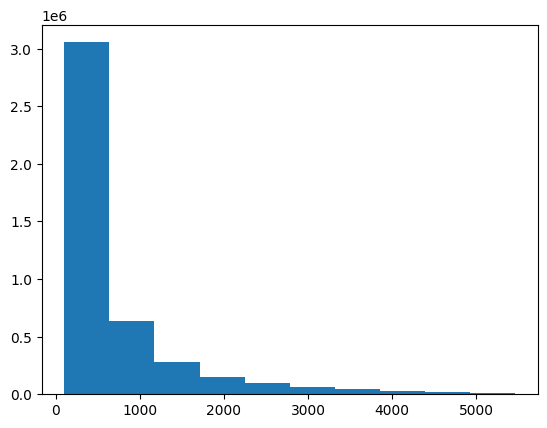

In [39]:
plt.hist(missing_count[:]);

# Computing Allele count at each site



In [45]:
%%time
m, num_alleles = root["variant_allele"].shape
gt_array = root["call_genotype"]
allele_count = zarr.zeros(shape=(m, num_alleles + 1), chunks=gt_array.chunks[0], dtype=int)
n_chunks = gt_array.cdata_shape[0]

def compute(v_chunk):
    G = gt_array.blocks[v_chunk].squeeze(axis=2)
    A = np.zeros((G.shape[0], allele_count.shape[1]), dtype=int)
    # Map missing data to extra allele
    G[G == -1] = num_alleles
    for j, genotypes in enumerate(G):
        A[j] = np.bincount(genotypes, minlength=num_alleles)
    return A

# We get less parallelism here because function does iterating in Python. Certainly
# better ways to do this.

with cf.ThreadPoolExecutor(8) as exec:
    futures = {exec.submit(compute, v_chunk): v_chunk for v_chunk in range(n_chunks)}
    for future in tqdm(cf.as_completed(futures), total=n_chunks):
        v_chunk = futures[future]
        allele_count.blocks[v_chunk] = future.result()

  0%|          | 0/300 [00:00<?, ?it/s]

CPU times: user 17min 38s, sys: 7min 57s, total: 25min 35s
Wall time: 4min 53s


In [107]:
allele_count

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       [0, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 9],
       [0, 0, 0, ..., 0, 0, 9],
       [0, 0, 0, ..., 0, 0, 9]])

In [81]:
has_missing = 0
more_than_one_allele = 0
for j in range(allele_count.shape[0]):
    has_missing += allele_count[j, -1] != 0
    more_than_one_allele += np.sum(allele_count[j, :-1] != 0) > 1
has_missing, more_than_one_allele

(29903, 29728)

In [82]:
29728 / 29903

0.9941477443734742

## Get a single sample's haplotype

In [68]:
%%time
k = 1_000_000
h = gt_array[:, k].squeeze(axis=1).T

CPU times: user 360 ms, sys: 7.72 ms, total: 367 ms
Wall time: 365 ms


In [49]:
SEQNAME = root["sample_id"][k]
SEQNAME

'SRR15984815'

## Get genotypes for a single site


In [119]:
%%time
j = gt_array.shape[0] // 2
g = gt_array[j].squeeze(axis=1).T

CPU times: user 277 ms, sys: 0 ns, total: 277 ms
Wall time: 276 ms


# Fetching single alignment from FASTA

The sequence we're looking for is in batch 19:

In [51]:
!grep {SEQNAME} {DATA_WORK_DIR}/batch1.extracted/index.tsv

SRR15984815	19


In [56]:
path = f"{DATA_WORK_DIR}/batch1.aln/19.aln"
path

'viridian_data/alignments/data/batch1.aln/19.aln'

In [64]:
import pyfaidx

reader =  pyfaidx.Fasta(path)

In [60]:
reader[SEQNAME][0:100]

>SRR15984815:1-100
--------------------------------------nnnnnnnnnnnnnnnnagatctgttctctaaacgaactttaaaatctgtgtggctgtcactc

In [67]:
%%time
a = reader[SEQNAME][:]

CPU times: user 2.01 ms, sys: 0 ns, total: 2.01 ms
Wall time: 1.37 ms


In [69]:
reader =  pyfaidx.Fasta(path + ".bgz")

In [70]:
reader

Fasta("viridian_data/alignments/data/batch1.aln/19.aln.bgz")

In [73]:
%%time
a = reader[SEQNAME][:]

CPU times: user 155 µs, sys: 55 µs, total: 210 µs
Wall time: 219 µs


pyfaidx is fast, getting a single sequence from the FASTA quite a lot faster than the Zarr here.

## Pysam

In [75]:
import pysam

ff = pysam.FastaFile(path)
ff

In [78]:
%%time
s = ff.fetch(SEQNAME)

CPU times: user 654 µs, sys: 62 µs, total: 716 µs
Wall time: 371 µs


In [79]:
ff = pysam.FastaFile(path + ".bgz")
ff

In [80]:
%%time
s = ff.fetch(SEQNAME)

CPU times: user 2.37 ms, sys: 0 ns, total: 2.37 ms
Wall time: 1.11 ms
